In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [2]:
train = pd.read_csv('water_potability.csv')
train.fillna('?', inplace=True)
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,?,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,?,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,?,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,?,392.449580,19.903225,?,2.798243,1
3273,9.41951,175.762646,33155.578218,7.350233,?,432.044783,11.039070,69.8454,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,?,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# use for numerical data, find the avarage for that feature
def find_average(df, key):
    total = 0
    count = 0
    for i in range(len(df[key])):
        if df[key][i] != '?':
            total += df[key][i]
            count += 1

    return total / count

In [4]:
replace = []
# get the value to replace ? for each feature
for key in train.keys():
    replace.append(find_average(train, key))

replace

[7.080794504276819,
 196.36949601730177,
 22014.09252607711,
 7.122276793425787,
 333.7757766108134,
 426.2051106825521,
 14.284970247677336,
 66.39629294676803,
 3.9667861697910576,
 0.3901098901098901]

In [18]:
def impute_missing_data(df, replace):
    for index, key in enumerate(df.keys()):
        df[key].replace(to_replace="?", value=replace[index], inplace=True)

In [19]:
impute_missing_data(train, replace)
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.41951,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.8454,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<IPython.core.display.Javascript object>


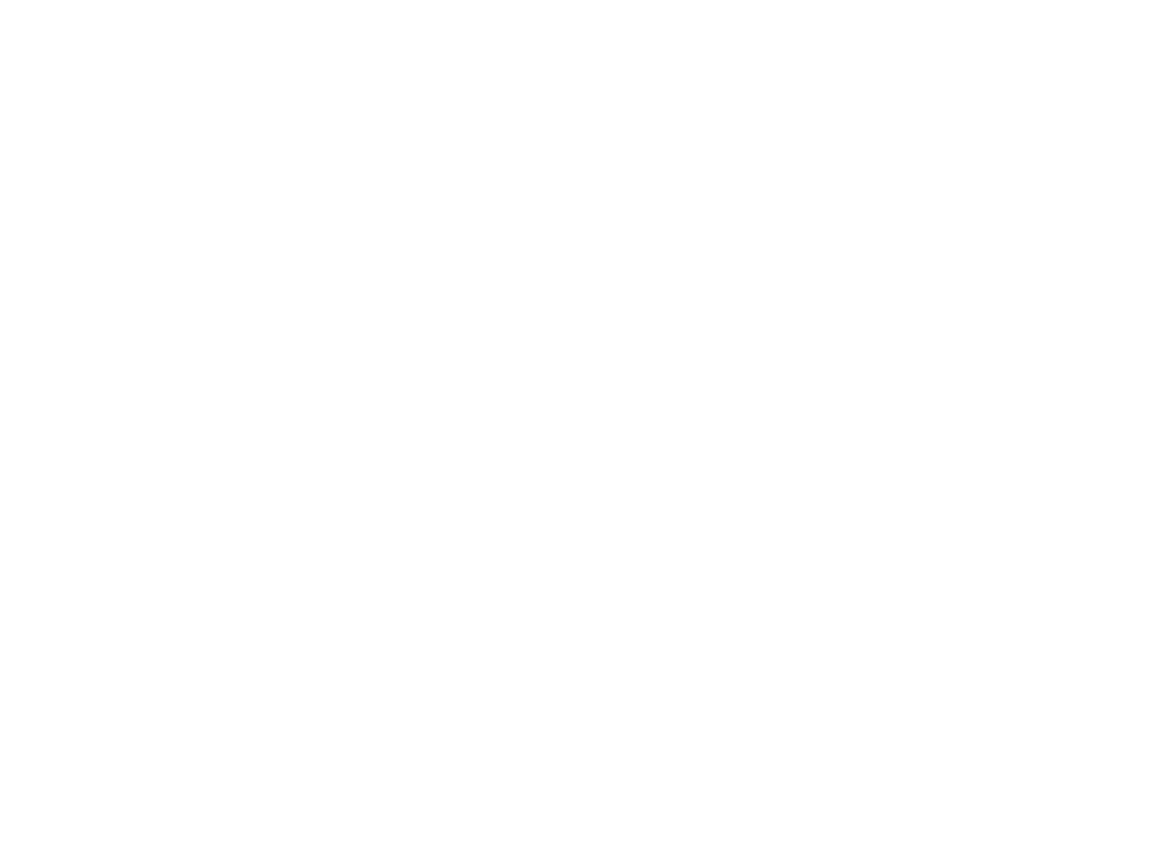

In [77]:
for i in range(9):
    key = train.keys()[i]
    ax = train[key].plot.hist(bins=100, figsize=(8,6), title=key)
    fig = ax.get_figure()
    fig.savefig(key)
    fig.clear()

<AxesSubplot:title={'center':'Hardness'}, ylabel='Frequency'>